# 1. (90%) Classification: 
In this exercise, you will implement a DNN model for binary classification using Data.csv. The objective in this exercise is to create and train a neural network to recognize fraudulent credit card transactions. You need to split the data into training (80%) and validation (20%) data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# read file from 'Data.csv'
df = pd.read_csv('Data.csv')

# split df into training set and test set 
df_copy = df.copy()
train_df = df_copy.sample(frac=0.8)  # frac: Fraction of axis items to return.
validation_df = df_copy.drop(train_df.index)

# reset index
train_df.reset_index(drop=True, inplace=True)
validation_df.reset_index(drop=True, inplace=True)

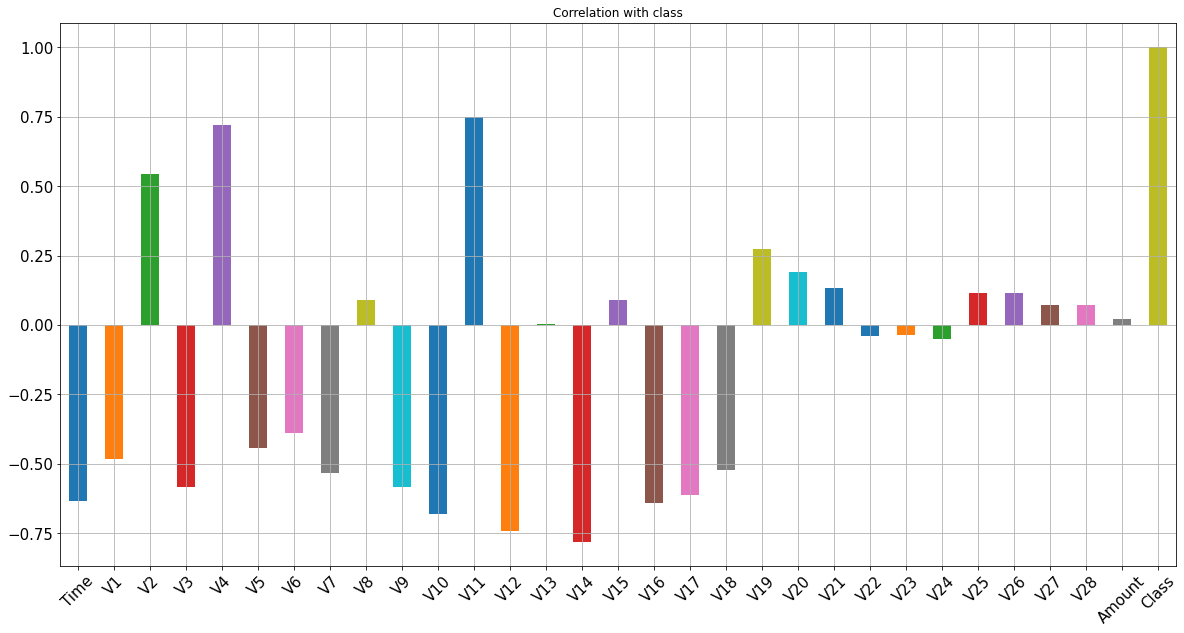

In [3]:
df.corrwith(df.Class).plot.bar(\
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,\
        rot = 45, grid = True)

In [64]:
# normalize column 'Time', 'Amount'
from sklearn.preprocessing import StandardScaler

df_copy = df.copy()
df_copy['Amount_normalized'] = StandardScaler().fit_transform(df_copy['Amount'].values.reshape(-1,1))
df_copy['Time_normalized'] = StandardScaler().fit_transform(df_copy['Time'].values.reshape(-1,1))

df_copy = df_copy.drop(['Amount'],axis=1)
df_copy = df_copy.drop(['Time'],axis=1)
df_copy.head()

# dividing the data values into features and target
X = df_copy.drop(columns = ['Class'], axis=1)
Y = df_copy['Class']

# split data into training, validation data (using Skicit-learn)
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 0) 

In [4]:
len(train_X)

1120

### (i) (40%) DNN

In [4]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

from keras.optimizers import Adam
#from keras.metrics import BinaryAccuracy, BinaryCrossentropy

def dnn_model(hidden_layers=1, neurons = 10, learning_rate=0.01):
    
    # create model
    model = Sequential()
    
    # input layer
    model.add(Dense(15, input_dim=30, activation='relu'))    # 要有幾個 neurons?
    model.add(Dropout(0.2))
    
    # hidden layer
    for i in range(hidden_layers):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(0.2))
    
    # output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compiling the NN
    optimizer = Adam(learning_rate = learning_rate)
    model.compile(optimizer = optimizer , loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

Using TensorFlow backend.


In [ ]:
# create model
# model = KerasClassifier(build_fn = dnn_model)

# # define the grid search parameters
# hidden_layers = [0, 1, 2]
# neurons = [5, 10, 15]
# learning_rate = [0.001, 0.01, 0.1]
# batch_size = [25, 50, 75, 100]
# epochs = [50, 75, 100]

# param_grid = dict(hidden_layers=hidden_layers, neurons=neurons, learning_rate=learning_rate, batch_size=batch_size, epochs=epochs)

# grid = GridSearchCV(estimator=model, param_grid=param_grid)
# grid_result = grid.fit(train_X, train_Y)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/50
746/746 [==============================] - 0s 164us/step - loss: 0.9669 - accuracy: 0.5228
Epoch 2/50
746/746 [==============================] - 0s 56us/step - loss: 0.5616 - accuracy: 0.7185
Epoch 3/50
746/746 [==============================] - 0s 49us/step - loss: 0.4715 - accuracy: 0.7802
Epoch 4/50
746/746 [==============================] - 0s 67us/step - loss: 0.4119 - accuracy: 0.8298
Epoch 5/50
746/746 [==============================] - 0s 53us/step - loss: 0.3688 - accuracy: 0.8767
Epoch 6/50
746/746 [==============================] - 0s 64us/step - loss: 0.3133 - accuracy: 0.9075
Epoch 7/50
746/746 [==============================] - 0s 56us/step - loss: 0.2824 - accuracy: 0.9236
Epoch 8/50
746/746 [==============================] - 0s 57us/step - loss: 0.2505 - accuracy: 0.9263
Epoch 9/50
746/746 [==============================] - 0s 60us/step - loss: 0.2321 - accuracy: 0.9370
Epoch 10/50
746/746 [==============================] - 0s 64us/step - loss: 0.2092 - accur

746/746 [==============================] - 0s 60us/step - loss: 0.2038 - accuracy: 0.9491
Epoch 10/50
746/746 [==============================] - 0s 57us/step - loss: 0.1731 - accuracy: 0.9531
Epoch 11/50
746/746 [==============================] - 0s 57us/step - loss: 0.1779 - accuracy: 0.9517
Epoch 12/50
746/746 [==============================] - 0s 52us/step - loss: 0.1741 - accuracy: 0.9517
Epoch 13/50
746/746 [==============================] - 0s 55us/step - loss: 0.1540 - accuracy: 0.9611
Epoch 14/50
746/746 [==============================] - 0s 56us/step - loss: 0.1675 - accuracy: 0.9611
Epoch 15/50
746/746 [==============================] - 0s 50us/step - loss: 0.1468 - accuracy: 0.9651
Epoch 16/50
746/746 [==============================] - 0s 53us/step - loss: 0.1295 - accuracy: 0.9638
Epoch 17/50
746/746 [==============================] - 0s 55us/step - loss: 0.1301 - accuracy: 0.9665
Epoch 18/50
746/746 [==============================] - 0s 51us/step - loss: 0.1297 - accuracy:

In [102]:
dnn = dnn_model(hidden_layers = 2, neurons = 15, learning_rate = 0.01)
history = dnn.fit(train_X, train_Y, batch_size = 25, epochs = 50, validation_data=(test_X, test_Y), verbose=0)

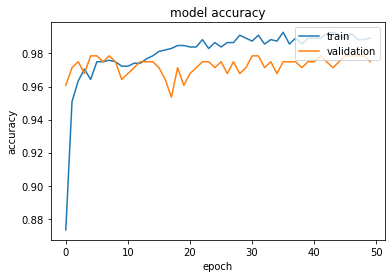

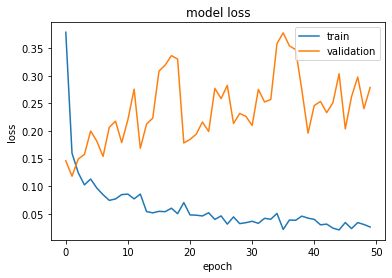

In [103]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right') 
plt.show()

# summarize history for loss 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right') 
plt.show()

### (ii) (10%) confusion matrices
Please plot confusion matrices for (i) as example in Figure 2.

In [128]:
from sklearn.metrics import confusion_matrix

train_Y_pred = dnn.predict(train_X.values)
train_Y_pred = (train_Y_pred > 0.5)
test_Y_pred = dnn.predict(test_X.values)
test_Y_pred = (test_Y_pred > 0.5)

train_confusion_matrix = confusion_matrix(train_Y, train_Y_pred)
test_confusion_matrix= confusion_matrix(test_Y, test_Y_pred)

print(train_confusion_matrix)
print(test_confusion_matrix)

[[741   3]
 [  2 374]]
[[192   2]
 [  5  81]]


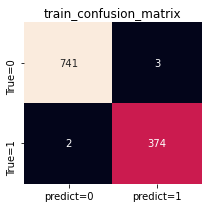

In [129]:
# Create pandas dataframe
dataframe = pd.DataFrame(train_confusion_matrix, index=['True=0','True=1'], columns=['predict=0', 'predict=1'])

# Create heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(dataframe, annot=True, cbar=None, fmt ='g')
plt.title("train_confusion_matrix")
plt.tight_layout()
plt.show()

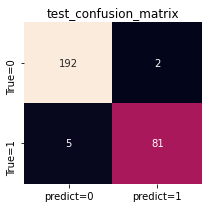

In [130]:
# Create pandas dataframe
dataframe = pd.DataFrame(test_confusion_matrix, index=['True=0','True=1'], columns=['predict=0', 'predict=1'])

# Create heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(dataframe, annot=True, cbar=None, fmt ='g')
plt.title("test_confusion_matrix")
plt.tight_layout()
plt.show()

### (iii) (10%) Precision, recall, F1-score
Precision, recall, F1-score are other ways to evaluate model performance. For each class, please record precision, recall and F1-score as well as the averages of those criteria over all classes in your report.

\begin{equation*}
Precision = \frac{TruePositive}{TruePositive+FalsePositive}
\end{equation*}

\begin{equation*}
Recall = \frac{TruePositive}{TruePositive+FalseNegative}
\end{equation*}

\begin{equation*}
F1-score = 2* \frac{Precision ∗ Recall}{Precision + Recall}
\end{equation*}

In [131]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

precision_score = precision_score(test_Y, test_Y_pred)
recall_score = recall_score(test_Y, test_Y_pred)
f1_score = f1_score(test_Y, test_Y_pred)

print("Precision: ", precision_score)
print("Recall: ", recall_score)
print("F1 Score: ", f1_score)

Precision:  0.9759036144578314
Recall:  0.9418604651162791
F1 Score:  0.9585798816568047


In [132]:
print(classification_report(test_Y, test_Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       194
           1       0.98      0.94      0.96        86

    accuracy                           0.97       280
   macro avg       0.98      0.97      0.97       280
weighted avg       0.98      0.97      0.97       280



### (iv) (10%) What is difference between decision tree and random forest?

A decision tree is built on an entire dataset by using all the features and observations from the data, whereas a random forest randomly selects observations and specific features to build multiple decision trees from and then aggregates the results into one final result (by voting from the result of the decision trees).

### (v) (10%) 
Please use decision tree and random forest to learn the binary classification task. Calculate the corresponding Accuracy, Precision, Recall and F1-Score.


In [134]:
## Decison Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

model_dt = DecisionTreeClassifier()
model_dt.fit(train_X, train_Y)

# Predicting Test Set
Y_pred_tree = model_dt.predict(test_X)

acc_tree = accuracy_score(test_Y, Y_pred_tree)
prec_tree = precision_score(test_Y, Y_pred_tree)
rec_tree = recall_score(test_Y, Y_pred_tree)
f1_tree = f1_score(test_Y, Y_pred_tree)

print("Accuracy: ", acc_tree)
print("Precision: ", prec_tree)
print("Recall: ", rec_tree)
print("F1 Score: ", f1_tree)

Accuracy:  0.9964285714285714
Precision:  1.0
Recall:  0.9883720930232558
F1 Score:  0.9941520467836257


In [135]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

model_rf = RandomForestClassifier()
model_rf.fit(train_X, train_Y)

# Predicting Test Set
Y_pred_randomForest = model_rf.predict(test_X)
#Y_pred_randomForest = (Y_pred_randomForest > 0.5)

acc_randomForest = accuracy_score(test_Y, Y_pred_randomForest)
prec_randomForest = precision_score(test_Y, Y_pred_randomForest)
rec_randomForest = recall_score(test_Y, Y_pred_randomForest)
f1_randomForest = f1_score(test_Y, Y_pred_randomForest)

print("Accuracy: ", acc_randomForest)
print("Precision: ", prec_randomForest)
print("Recall: ", rec_randomForest)
print("F1 Score: ", f1_randomForest)

Accuracy:  0.9821428571428571
Precision:  0.9879518072289156
Recall:  0.9534883720930233
F1 Score:  0.9704142011834319


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### (vi) (10%) ROC curve and Precision-recall curve
You have to plot learning curve, receiver operating characteristic curve (ROC, as shown in Figure 3) and precision-recall curve (PRC, as shown in Figure 3) with their area-under-curve (AUROC and AUPRC) for DNN, decision tree and random forest.

In [136]:
# calculate Y_pred
Y_pred_dnn = dnn.predict(test_X.values)
Y_pred_dnn_proba = [ele[0] for ele in Y_pred_dnn]

Y_pred_tree_proba = model_dt.predict_proba(test_X)
Y_pred_tree_proba = [ele[1] for ele in Y_pred_tree_proba]

Y_pred_randomForest_proba = model_rf.predict_proba(test_X)
Y_pred_randomForest_proba = [ele[1] for ele in Y_pred_randomForest_proba]

AUC:  0.98 , 0.994 , 0.999


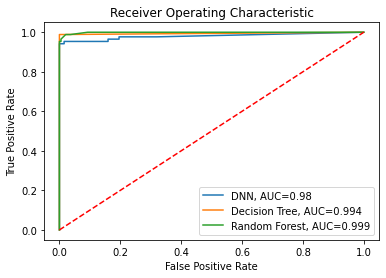

In [137]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure()

# calculate ROC curve
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(test_Y, Y_pred_dnn_proba)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(test_Y, Y_pred_tree_proba)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, Y_pred_randomForest_proba)

# calculate AUC
auc_dnn = round(roc_auc_score(test_Y, Y_pred_dnn_proba),3)
auc_dt = round(roc_auc_score(test_Y, Y_pred_tree_proba),3)
auc_rf = round(roc_auc_score(test_Y,Y_pred_randomForest_proba),3)
print('AUC: ', auc_dnn, ',' , auc_dt, ',' , auc_rf)

# plot the roc curve for the model
plt.plot(fpr_dnn, tpr_dnn, label='DNN, AUC='+str(auc_dnn))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree, AUC='+str(auc_dt))
plt.plot(fpr_rf, tpr_rf, label='Random Forest, AUC='+str(auc_rf))

#plt.plot([0,1],[0,1],'--')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.title("Receiver Operating Characteristic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC:  0.98 , 0.996 , 0.998


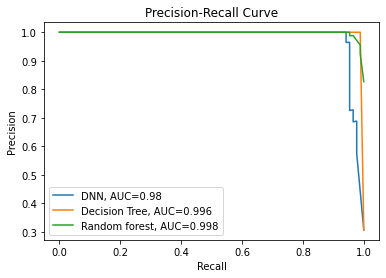

In [138]:
from sklearn.metrics import precision_recall_curve, auc

# calculate precision-recall curve
precision_dnn, recall_dnn, thresholds_dnn = precision_recall_curve(test_Y, Y_pred_dnn_proba)
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(test_Y, Y_pred_tree_proba)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(test_Y, Y_pred_randomForest_proba)

# calculate precision-recall AUC
pr_auc_dnn = round(auc(recall_dnn, precision_dnn),3)
pr_auc_dt = round(auc(recall_dt, precision_dt),3)
pr_auc_rf = round(auc(recall_rf, precision_rf),3)
print('AUC: ', pr_auc_dnn, ',' , pr_auc_dt, ',' , pr_auc_rf)

# plot the precision-recall curves
plt.plot(recall_dnn, precision_dnn, label='DNN, AUC='+str(pr_auc_dnn))
plt.plot(recall_dt, precision_dt, label='Decision Tree, AUC='+str(pr_auc_dt))
plt.plot(recall_rf, precision_rf, label='Random forest, AUC='+str(pr_auc_rf))

plt.title("Precision-Recall Curve")
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# 2. (10%) Lift curve:
Here is an introduction to the concept of lift curve, which is commonly used in marketing analysis.
Following is the meaning of each axis: The x-axis sorted all samples from high to low according
to the prediction values, which means that closer to origin with higher prediction value; and the
y-axis means the accumulated true positives. The following graph is an example of lift curve.

### (a) (10%) 
Please draw the lift curve of models in problem 1: DNN, decision tree and random forest. Please also draw the ideal lift curve and random guess like the above figure.

In [123]:
dic = {'actual':test_Y , 'DNN':list(Y_pred_dnn_proba), 'DT':list(Y_pred_tree_proba), 'RF':list(Y_pred_randomForest_proba)}
df = pd.DataFrame(dic)
#result_df = pd.concat([df, dnn_df], axis=1, sort=False)

In [171]:
def get_cum_gains(df, pred, target):
      
    df_copy = df.loc[:,[pred,target]]  #df[[pred,target]]
    
    ### model cumulative sum
    # x-axis: sorted all samples from high to low according to the prediction values
    # y-axis: means the accumulated true positives
    df_copy = df_copy.sort_values(by=[pred], ascending=False)
    df_copy['pred'] = df_copy.apply(lambda row: 1 if row[pred] >= 0.5 else 0, axis=1)
    df_copy['pred_tp'] = df_copy.apply(lambda row: 1 if (row['pred']==row[target]) and (row[target]==1) else 0, axis=1)     
    df_copy['model cumulative sum'] = df_copy['pred_tp'].cumsum()
    df_copy = df_copy.reset_index(drop=True)
    
    ### ideal model
    # total amount of true positives
    total_tp = df_copy['model cumulative sum'].max()
    print(total_tp)
    df_copy['pred_ideal'] = df_copy['pred_tp']
    df_copy.loc[0:(total_tp-1),'pred_ideal'] = 1
    df_copy.loc[total_tp:-1,'pred_ideal'] = 0
    df_copy['ideal model'] = df_copy['pred_ideal'].cumsum()

    
    df_copy['ideal model'].plot()
    df_copy['model cumulative sum'].plot()
    #plt.plot([0, total_fp], [0, total_fp], [total_fp, len(df_copy)], [total_fp, total_fp], 'black', label='ideal')
    
    plt.plot([0, len(df_copy)], [0, total_tp], 'r', label='random guess')
    plt.xlim([0, len(df_copy)])
    plt.ylim([0 , total_tp+10])
    
    plt.xlabel('samples')
    plt.ylabel('total events')
    plt.title(pred + ' - Cumulative Gains Chart')
    plt.legend(loc="lower right")


81


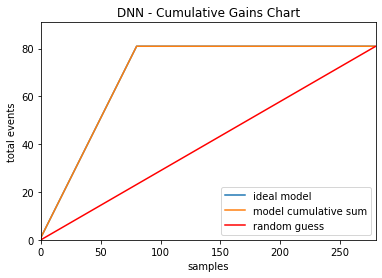

In [172]:
get_cum_gains(df, 'DNN', 'actual')

85


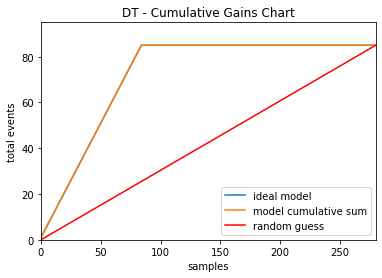

In [173]:
get_cum_gains(df, 'DT', 'actual')

82


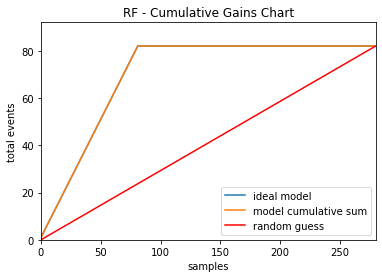

In [174]:
get_cum_gains(df, 'RF', 'actual')